<a href="https://colab.research.google.com/github/GusevMihail/seamless_textute_generator/blob/master/sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os.path
import sys
if 'google' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    !mkdir Data
    if not os.path.exists('Data/train'):
        !cp drive/My\ Drive/Colab/seamless_textute_generator/data/concrete_maps.zip Data
        !unzip -q -n Data/concrete_maps.zip -d Data
        # !rm Data/journey-springfield.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘Data’: File exists


In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
from torchvision import transforms, models
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import cv2

In [54]:
dataset = ImageFolder('Data')

In [23]:
data_folder = r'Data/'
image_names = tuple(f for f in os.listdir(data_folder) if os.path.isfile(os.path.join(data_folder, f)))


In [57]:
from torch.utils import data
from PIL import Image

class TextureDataset(data.Dataset):

    def __init__(self, root_path, file_list, transforms=None):
        super().__init__()
        self.root_path = root_path
        self.file_list = file_list
        self.transforms = transforms

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, index):
        if index not in range(0, len(self.file_list)):
            print('invalid index!')
            return self.__getitem__(np.random.randint(0, self.__len__()))

        # image_path = self.file_list[index]

        # image_folder = os.path.join(self.root_path, "images")
        # mask_folder = os.path.join(self.root_path, "masks")
        image_path = os.path.join(self.root_path, self.file_list[index])
        # mask_path = os.path.join(mask_folder, file_id + ".png")

        # image = cv2.imread(image_path)
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = Image.open(image_path)
        # mask = cv2.imread(mask_path, flags=cv2.IMREAD_GRAYSCALE)

        if self.transforms is not None:
            transformed = self.transforms(image=image)
            image = transformed['image']
            # mask = transformed['mask']

        return image

In [58]:
dataset = TextureDataset(data_folder, image_names)

In [60]:
dataset[0]

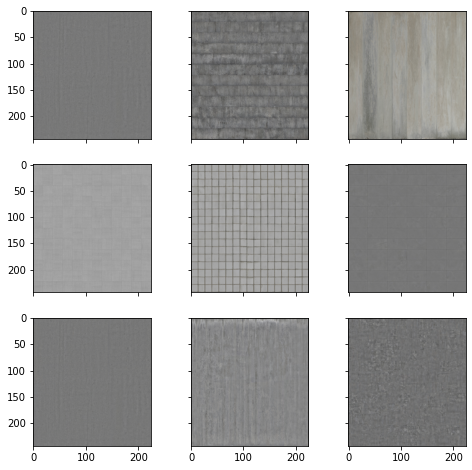

In [61]:


# look at the image
np.random.seed(42)

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8, 8),
                       sharey=True, sharex=True)

for fig_x in ax.flatten():
    i = np.random.choice(len(dataset), 1)[0]
    im = dataset[i]

    im = im.resize((224, 244))
    fig_x.imshow(im)
    # if img_label is not None:
    #     fig_x.set_title(img_label)
    fig_x.grid(False)

